### Grid Search CV = Hyperparameter Tuning + Cross Validation

In [1]:
import numpy as np
from sklearn.model_selection import (train_test_split, 
                                     cross_val_score,KFold, GridSearchCV)
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [2]:
digits = load_digits()

In [3]:
X = digits.data
Y = digits.target

In [5]:
X.shape

(1797, 64)

In [4]:
param_grid = {
    'C':[.0001,.001,.01,1,10],
    'kernel':['linear', 'rbf'],
    'gamma':[.001,.01,10,100]
}

In [6]:
kf = KFold(n_splits=10, shuffle=True)
gs = GridSearchCV(SVC(random_state=1), param_grid=param_grid,
                 cv=kf, scoring='accuracy')

In [8]:
gs.fit(X,Y)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=SVC(random_state=1),
             param_grid={'C': [0.0001, 0.001, 0.01, 1, 10],
                         'gamma': [0.001, 0.01, 10, 100],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [9]:
gs.best_estimator_

SVC(C=10, gamma=0.001, random_state=1)

In [10]:
gs.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

In [11]:
gs.best_score_

0.9910986964618249

In [14]:
# gs.cv_results_

In [18]:
import pandas as pd
df = pd.DataFrame(gs.cv_results_)
newdf = df[["param_C","param_gamma","param_kernel","mean_test_score"]]
newdf

param_C param_gamma param_kernel  mean_test_score
0   0.0001       0.001       linear         0.961589
1   0.0001       0.001          rbf         0.071794
2   0.0001        0.01       linear         0.961589
3   0.0001        0.01          rbf         0.071794
4   0.0001          10       linear         0.961589
5   0.0001          10          rbf         0.071794
6   0.0001         100       linear         0.961589
7   0.0001         100          rbf         0.071794
8    0.001       0.001       linear         0.984975
9    0.001       0.001          rbf         0.071794
10   0.001        0.01       linear         0.984975
11   0.001        0.01          rbf         0.071794
12   0.001          10       linear         0.984975
13   0.001          10          rbf         0.071794
14   0.001         100       linear         0.984975
15   0.001         100          rbf         0.071794
16    0.01       0.001       linear         0.978852
17    0.01       0.001          rbf         0.163122
18    0.01        0.01       linear         0.978852
19    0.01        0.01          rbf         0.071794
20    0.01          10       linear         0.978852
21    0.01          10          rbf         0.071794
22    0.01         100       linear         0.978852
23    0.01         100          rbf         0.071794
24       1       0.001       linear         0.978852
25       1       0.001          rbf         0.989984
26       1        0.01       linear         0.978852
27       1        0.01          rbf         0.823631
28       1          10       linear         0.978852
29       1          10          rbf         0.071794
30       1         100       linear         0.978852
31       1         100          rbf         0.071794
32      10       0.001       linear         0.978852
33      10       0.001          rbf         0.991099
34      10        0.01       linear         0.978852
35      10        0.01          rbf         0.834755
36      10          10       linear         0.978852
37      10          10          rbf         0.071794
38      10         100       linear         0.978852
39      10         100          rbf         0.071794

In [20]:
newdf[newdf["mean_test_score"]==newdf["mean_test_score"].max()]

param_C param_gamma param_kernel  mean_test_score
33      10       0.001          rbf         0.991099

In [21]:
model = gs.best_estimator_
model

SVC(C=10, gamma=0.001, random_state=1)

In [22]:
model.fit(X,Y)

SVC(C=10, gamma=0.001, random_state=1)

In [23]:
model.score(X,Y)

1.0

In [24]:
pred = model.predict(X)

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(Y,pred)

1.0

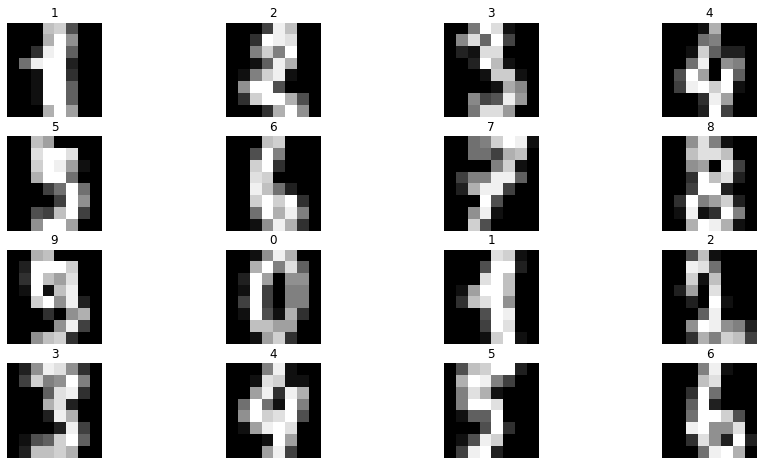

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.imshow(X[i].reshape(8,8), cmap='gray')
    plt.title(pred[i])
    plt.axis('off')